# BINARY STAR IDENTIFICATION

In [33]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy.visualization.mpl_normalize import simple_norm
import matplotlib.pyplot as plt
import numpy as np
import os 
import shutil
import glob
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Column
from astropy.nddata import CCDData
from astropy.io import fits
from astropy.visualization import LogStretch, ImageNormalize
import pandas as pd
from scipy.optimize import minimize

In [34]:
# Paths

path_omeg = os.path.join("OMEGA_CENTAURI.csv")
path_ngc4755 = os.path.join("NGC_4755.csv")
path_ngc6694 = os.path.join("NGC_6694.csv")
path_m42 = os.path.join("MESSIER_42.csv")

In [35]:
omega_cen = pd.read_csv(path_omeg) # 100 arcsec
ngc_4755 = pd.read_csv(path_ngc4755) # 200 arcsec
ngc_6694 = pd.read_csv(path_ngc6694) # 200 arcsec
m42 = pd.read_csv(path_m42)

In [36]:
omega_cen.keys()

Index(['source_id', 'ra', 'dec', 'parallax', 'pmra', 'pmdec', 'ruwe',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'bp_rp',
       'bp_g', 'g_rp', 'radial_velocity', 'phot_variable_flag',
       'non_single_star', 'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'teff_gspphot', 'logg_gspphot', 'mh_gspphot',
       'distance_gspphot', 'azero_gspphot', 'ag_gspphot', 'ebpminrp_gspphot'],
      dtype='object')

In [37]:
omega_bprp = omega_cen['bp_rp']
omega_v = omega_cen['phot_g_mean_mag']
omega_bp = omega_cen['phot_bp_mean_mag']

In [38]:
ngc4755_bprp = ngc_4755['bp_rp']
ngc4755_v = ngc_4755['phot_g_mean_mag']

In [39]:
ngc6694_bprp = ngc_6694['bp_rp']
ngc6694_v = ngc_6694['phot_g_mean_mag']

In [40]:
m42_bprp = m42['bp_rp']
m42_v = m42['phot_g_mean_mag']

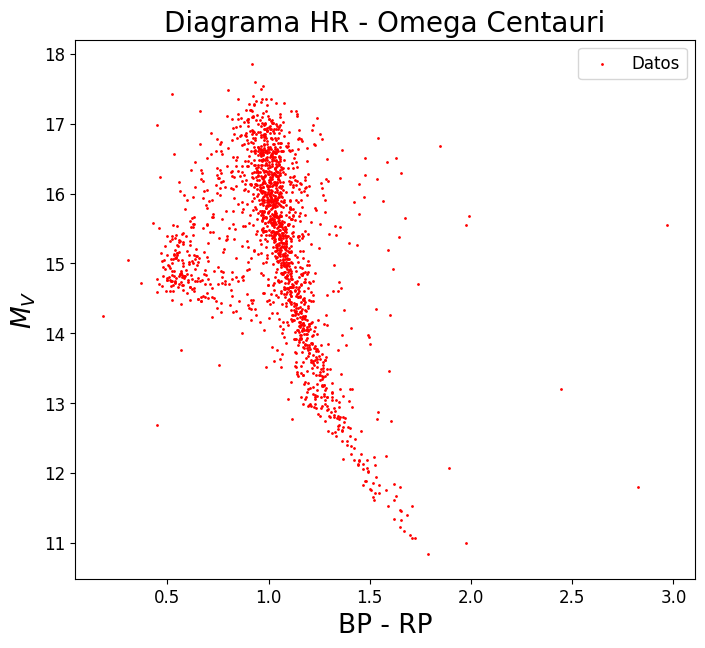

In [41]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(omega_bprp, omega_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - Omega Centauri', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

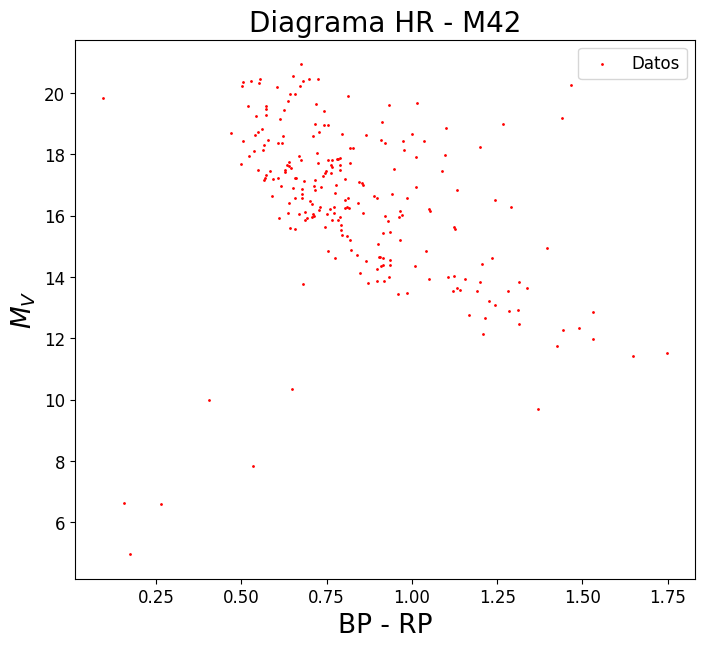

In [42]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(m42_bprp, m42_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - M42', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

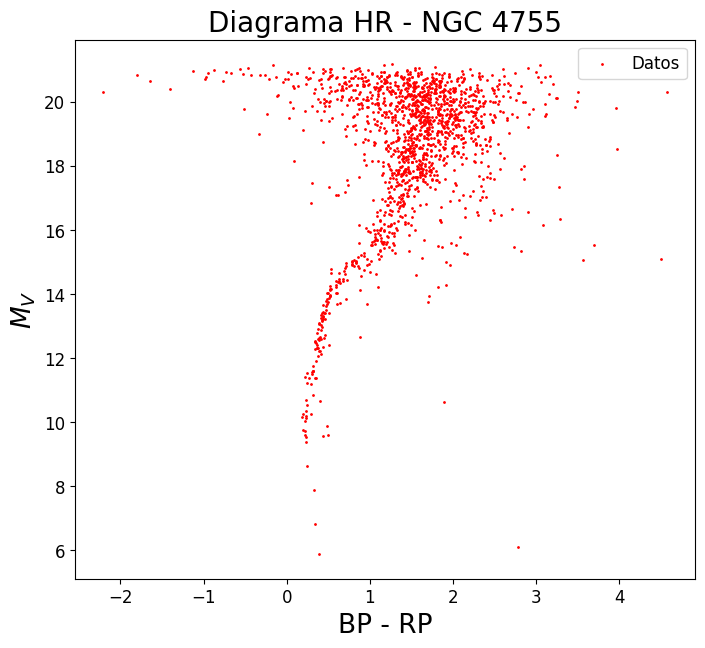

In [43]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc4755_bprp, ngc4755_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - NGC 4755', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()

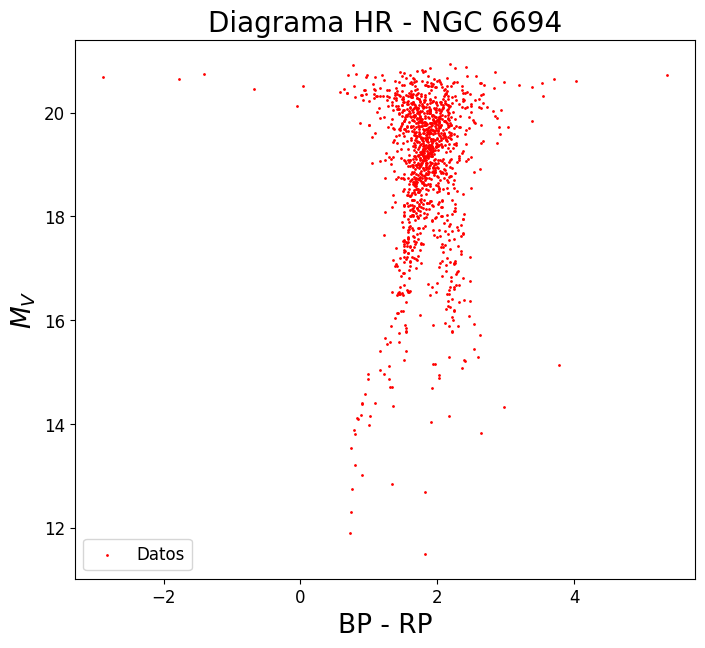

In [44]:
fig, ax = plt.subplots(figsize=[8,7])
ax.scatter(ngc6694_bprp, ngc6694_v, c='red', s=1, label='Datos')
ax.set_title('Diagrama HR - NGC 6694', fontsize=20)
ax.set_xlabel('BP - RP', fontsize=19)
ax.set_ylabel('$M_{V}$', fontsize=19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
fig.tight_layout()